## Week4-Assignment
뉴스 기사를 분류해보기!
word2vec, doc2vec 등 아무거나 사용해도 되고,
분류 자체도 코사인유사도, PCA, random forest, 두개로 나뉘니까 logistic regression 등 편하신 코드를 사용하시면 될 것 같습니다!


In [1]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.font_manager._rebuild()
plt.rc('font', family='NanumBarunGothic')

!pip install soynlp
!pip install konlpy
!pip install wordcloud
!pip install soynlp

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



### A. 한글 기사

In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import sklearn

In [3]:
def get_breaking_link():
    url = "https://search.naver.com/search.naver?"

    url_list = []
    #크롤링할 페이지수 
    for i in range(0,30):
      params = {
          # 탭
          "where": 'news',

          # 검색어
          "query": '속보',

          # 페이지
          "start": i,
      }

      response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}, params=params)
      soup = BeautifulSoup(response.text, "html.parser")


      for i in soup.select('div.info_group > a'):
          if re.search('news.naver.com', i['href']):
              url_list.append(i['href'])

    return url_list

def get_link(query):
    url = "https://search.naver.com/search.naver?"

    url_list = []
    #크롤링할 페이지수 
    for i in range(0,1):
      params = {
          # 탭
          "where": 'news',

          # 검색어
          "query": query,

          # 페이지
          "start": i,
      }

      response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}, params=params)
      soup = BeautifulSoup(response.text, "html.parser")


      for i in soup.select('div.info_group > a'):
          if re.search('news.naver.com', i['href']):
              url_list.append(i['href'])

    return url_list


def get_article(url_list):

    title_list = []
    content_list = []
    for url in url_list:
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        try:
          document_content = BeautifulSoup(response.content, "html.parser")
        except Exception as e:
          print(f"crawling failed for url:{url}, Error: {e}")
          continue  
          
        # 기사 제목 가져옴
        tag_headline = document_content.find_all('h3', {'id': 'articleTitle'}, {'class': 'tts_head'})
        text_headline = ''  # 뉴스 기사 제목 초기화
        text_sentence = ''  # 뉴스 기사 본문 초기화
        try:
          # 기사  제목 예시 : [<h3 id="articleTitle">]제목내용</h3>]
          # 필요 없는 내용 날리고 깔끔하게 처리해주기
          text_headline = text_headline + str(tag_headline[0].find_all(text=True))
          if not text_headline:  # 공백일 경우 기사 제외 처리
            continue
          # 기사 본문 가져옴
          tag_content = document_content.find_all('div', {'id': 'articleBodyContents'})
          text_sentence = text_sentence + str(tag_content[0].find_all(text=True))
          if not text_sentence:  # 공백일 경우 기사 제외 처리
            continue
          title_list.append(text_headline)
          content_list.append(text_sentence)
        except Exception as e: 
          print('fail')
    return title_list, content_list

In [4]:
#검색어를 입력해주세요
query1= input("검색어(한글)를 입력해주세요: ")
news_link1 = get_link(query1)
print(news_link1)
print()
news_title1, news_content1 = get_article(news_link1)
#제목이랑 내용이랑 같은 숫자인지 확인
len(news_title1) , len(news_content1)

검색어(한글)를 입력해주세요:  아이유


['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=144&aid=0000727950', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=076&aid=0003710846', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=469&aid=0000593766', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=052&aid=0001570260', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=468&aid=0000757217', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=312&aid=0000475964', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=015&aid=0004522814', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=009&aid=0004772584']

fail
fail
fail
fail
fail
fail
fail
fail


(0, 0)

In [5]:
#속보를 가져옵니다
news_link2 = get_breaking_link()
print(news_link2)
print()
news_title2, news_content2 = get_article(news_link2)
#제목이랑 내용이랑 같은 숫자인지 확인
len(news_title2) , len(news_content2)

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=009&aid=0004773425', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=052&aid=0001570280', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=081&aid=0003175825', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=215&aid=0000948243', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=366&aid=0000694599', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004523588', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=079&aid=0003487762', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=005&aid=0001426651', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=374&aid=0000239429', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=011&aid=0003891804', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=009&aid=0004773425', 'https://news.naver.

(300, 300)

In [6]:
#두개의 내용을 섞어줍니다

segment = []
news_title = news_title1 + news_title2
news_content = news_content1 + news_content2
for i in range(len(news_title1)):
  segment.append(query1)
for i in range(len(news_title2)):  
  segment.append('속보')

In [7]:
def title_preprocessing(text):
    val_split = text.split(sep='flash_removeCallback() {}\n\n')
    val_split
    text = text.replace('무단 전재 재배포 금지','')
    text = text.replace("\\\\n", "")
    text = text.replace("\\n", "")
    text = text.replace("\n", "")
    text = text.replace("\\", "")
    text = text.replace("\\t", "")
    text = text.replace("NaN", "")
    text = text.replace("  ", " ")
    text = text.replace("\t", "")

    # 한글, english 빼고 전부 날리기
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z|0-9|.|]', ' ', text)
    text = re.sub('[-=+,#/\?:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》{}_▲▶兆]', '', text)
    return text

def content_preprocessing(text):
    val_split = text.split(sep='flash_removeCallback()')
    text = val_split[1]
    text = text.replace('무단 전재 재배포 금지','')
    text = text.replace("\\\\n", "")
    text = text.replace("\\n", "")
    text = text.replace("\n", "")
    text = text.replace("\\tt", "")
    text = text.replace("\tt", "")
    text = text.replace("\t", "")
    text = text.replace("\\", "")
    text = text.replace("\\t", "")
    text = text.replace("NaN", "")
    text = text.replace("  ", " ")
    text = text.replace("\t", "")

    # 한글, english 빼고 전부 날리기
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z|0-9|.|]', ' ', text)
    text = re.sub('[-=+,#/\?:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》{}_▲▶兆]', '', text)
    return text

news_list_1 = []
news_list_2 = []

for i in news_title:
    news_list_1.append(title_preprocessing(i))

for i in news_content:    
    news_list_2.append(content_preprocessing(i))

In [8]:
df_merge = pd.DataFrame(list(zip(segment,news_list_1, news_list_2)),
              columns=['segment','title','content'])
#df_merge=sklearn.utils.shuffle(df_merge)
df_merge = df_merge.reset_index()
df_merge['index'] = df_merge['index'].astype(str)
df_merge.head()

,index,segment,title,content
0,0,속보,속보 군사망조사위 천안함 재조사 진정 각하 결정,천안함 침몰 후 6일째인 지난 2010년 3월 31일 현장 지휘...
1,1,속보,속보 군사망조사위 천안함 재조사 진정 각하 결정,tt군사망조사위 천안함 재조사 진정 각하 결정 자세한 뉴...
2,2,속보,속보 경찰 부동산 투기 의혹 전 하남시 공무원 자택 등 압수수색,교산신도시 예정 천현동 토지 1900 매입 도시건설국장 ...
3,3,속보,속보 558명 신규 확진 코로나19 사흘 연속 500명대,한국경제TV 이영호 기자 코로나19 확산세가 거세질 양...
4,4,속보,속보 3월 소비자물가 전년 1.5 상승...파 가격 300 올라,파 가격 1994년 4월 이후 가장 많이 올라 소비자물가 ...


In [9]:
df_merge.tail()

,index,segment,title,content
295,295,속보,속보 방역수칙 위반 업소 안 봐준다 재위반시 즉시 집합금지,수칙 위반 확인 땐 무관용 원칙 적용 사진 뉴스1 ...
296,296,속보,속보 코로나19 신규 확진자 551명 41일만에 가장 많아,중앙방역대책본부 1일 0시 기준 지역발생 537 국외유입...
297,297,속보,속보 정부 전국 거리두기 현 단계 유지 필요시 지역별로 단계 격상,4 7 재 보궐선거 사전투표 첫날인 2일 오전 부산 연제구청에 ...
298,298,속보,속보 TSMC 3년간 113조원 투자 가격 인하 연기,TSMC CEO 수천명 고용했고 다수의 새 공장 건설 ...
299,299,속보,속보 신규확진 558명 3일째 500명대 국내발생 533명,서울 뉴시스 배훈식 기자 코로나19 신규 확진자가 이틀 연...


In [10]:
#word2vec 후 백터의 평균값 구하기 혹은 dec2vec 임베딩 이후 아래 코드를 참고하셔서, 시각화하는 것이 과제입니다! 
#시각화 하실 때 검색어의 segment와 속보의 segment를 구분하면 좋을 것 같아요!
#아래 코드는 준교님이 진행하신 실습 https://colab.research.google.com/drive/1SNZM9IaUO7QXMsNKbFCH0V12jxAvTNL1#scrollTo=Mn4Y6ueQPa8y 에서 가져왔어요
#이외의 부분은 참고하시면 될 것 같아요
#유의미하게 학습하려면 기사 20000개는 필요할 것 같은데 너무 오래결러서 

# >>>>> word2vec 임베딩 해서 시각화만 하는걸로 하고, 위에 언급한 부분은 하고 싶은 것만 하시면 될 것 같아요.

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokens = df_merge['content'].tolist()
tokenizer.fit_on_texts(tokens)

word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokens)
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 2843


In [24]:
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

skip_grams = [skipgrams(sample, vocabulary_size= vocab_size, window_size=10) for sample in encoded]
embed_size = 50

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs) # 정수 인코딩된 단어를 입력받아 임베딩 수행

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

# 모델 구성
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        142150      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        142150      input_2[0][0]                    
______________________________________________________________________________________________

In [25]:
# epoch 당 1분? 정도 걸립니다
for epoch in range(1, 16):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')  # 중심 단어
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32') # 주변 단어
        labels = np.array(elem[1], dtype='int32')                     # 정답 레이블
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  # Runs a single gradient update on a single batch of data.
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 201.98240858316422
Epoch : 2 Loss : 166.29918336868286
Epoch : 3 Loss : 130.81415216624737
Epoch : 4 Loss : 107.6681476533413
Epoch : 5 Loss : 91.33048418164253
Epoch : 6 Loss : 79.08348180353642
Epoch : 7 Loss : 69.54176274687052
Epoch : 8 Loss : 61.910333178937435
Epoch : 9 Loss : 55.69779749214649
Epoch : 10 Loss : 50.5719558224082
Epoch : 11 Loss : 46.294131733477116
Epoch : 12 Loss : 42.687945015728474
Epoch : 13 Loss : 39.62098826467991
Epoch : 14 Loss : 36.99234328046441
Epoch : 15 Loss : 34.72379784658551


In [27]:
import gensim
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

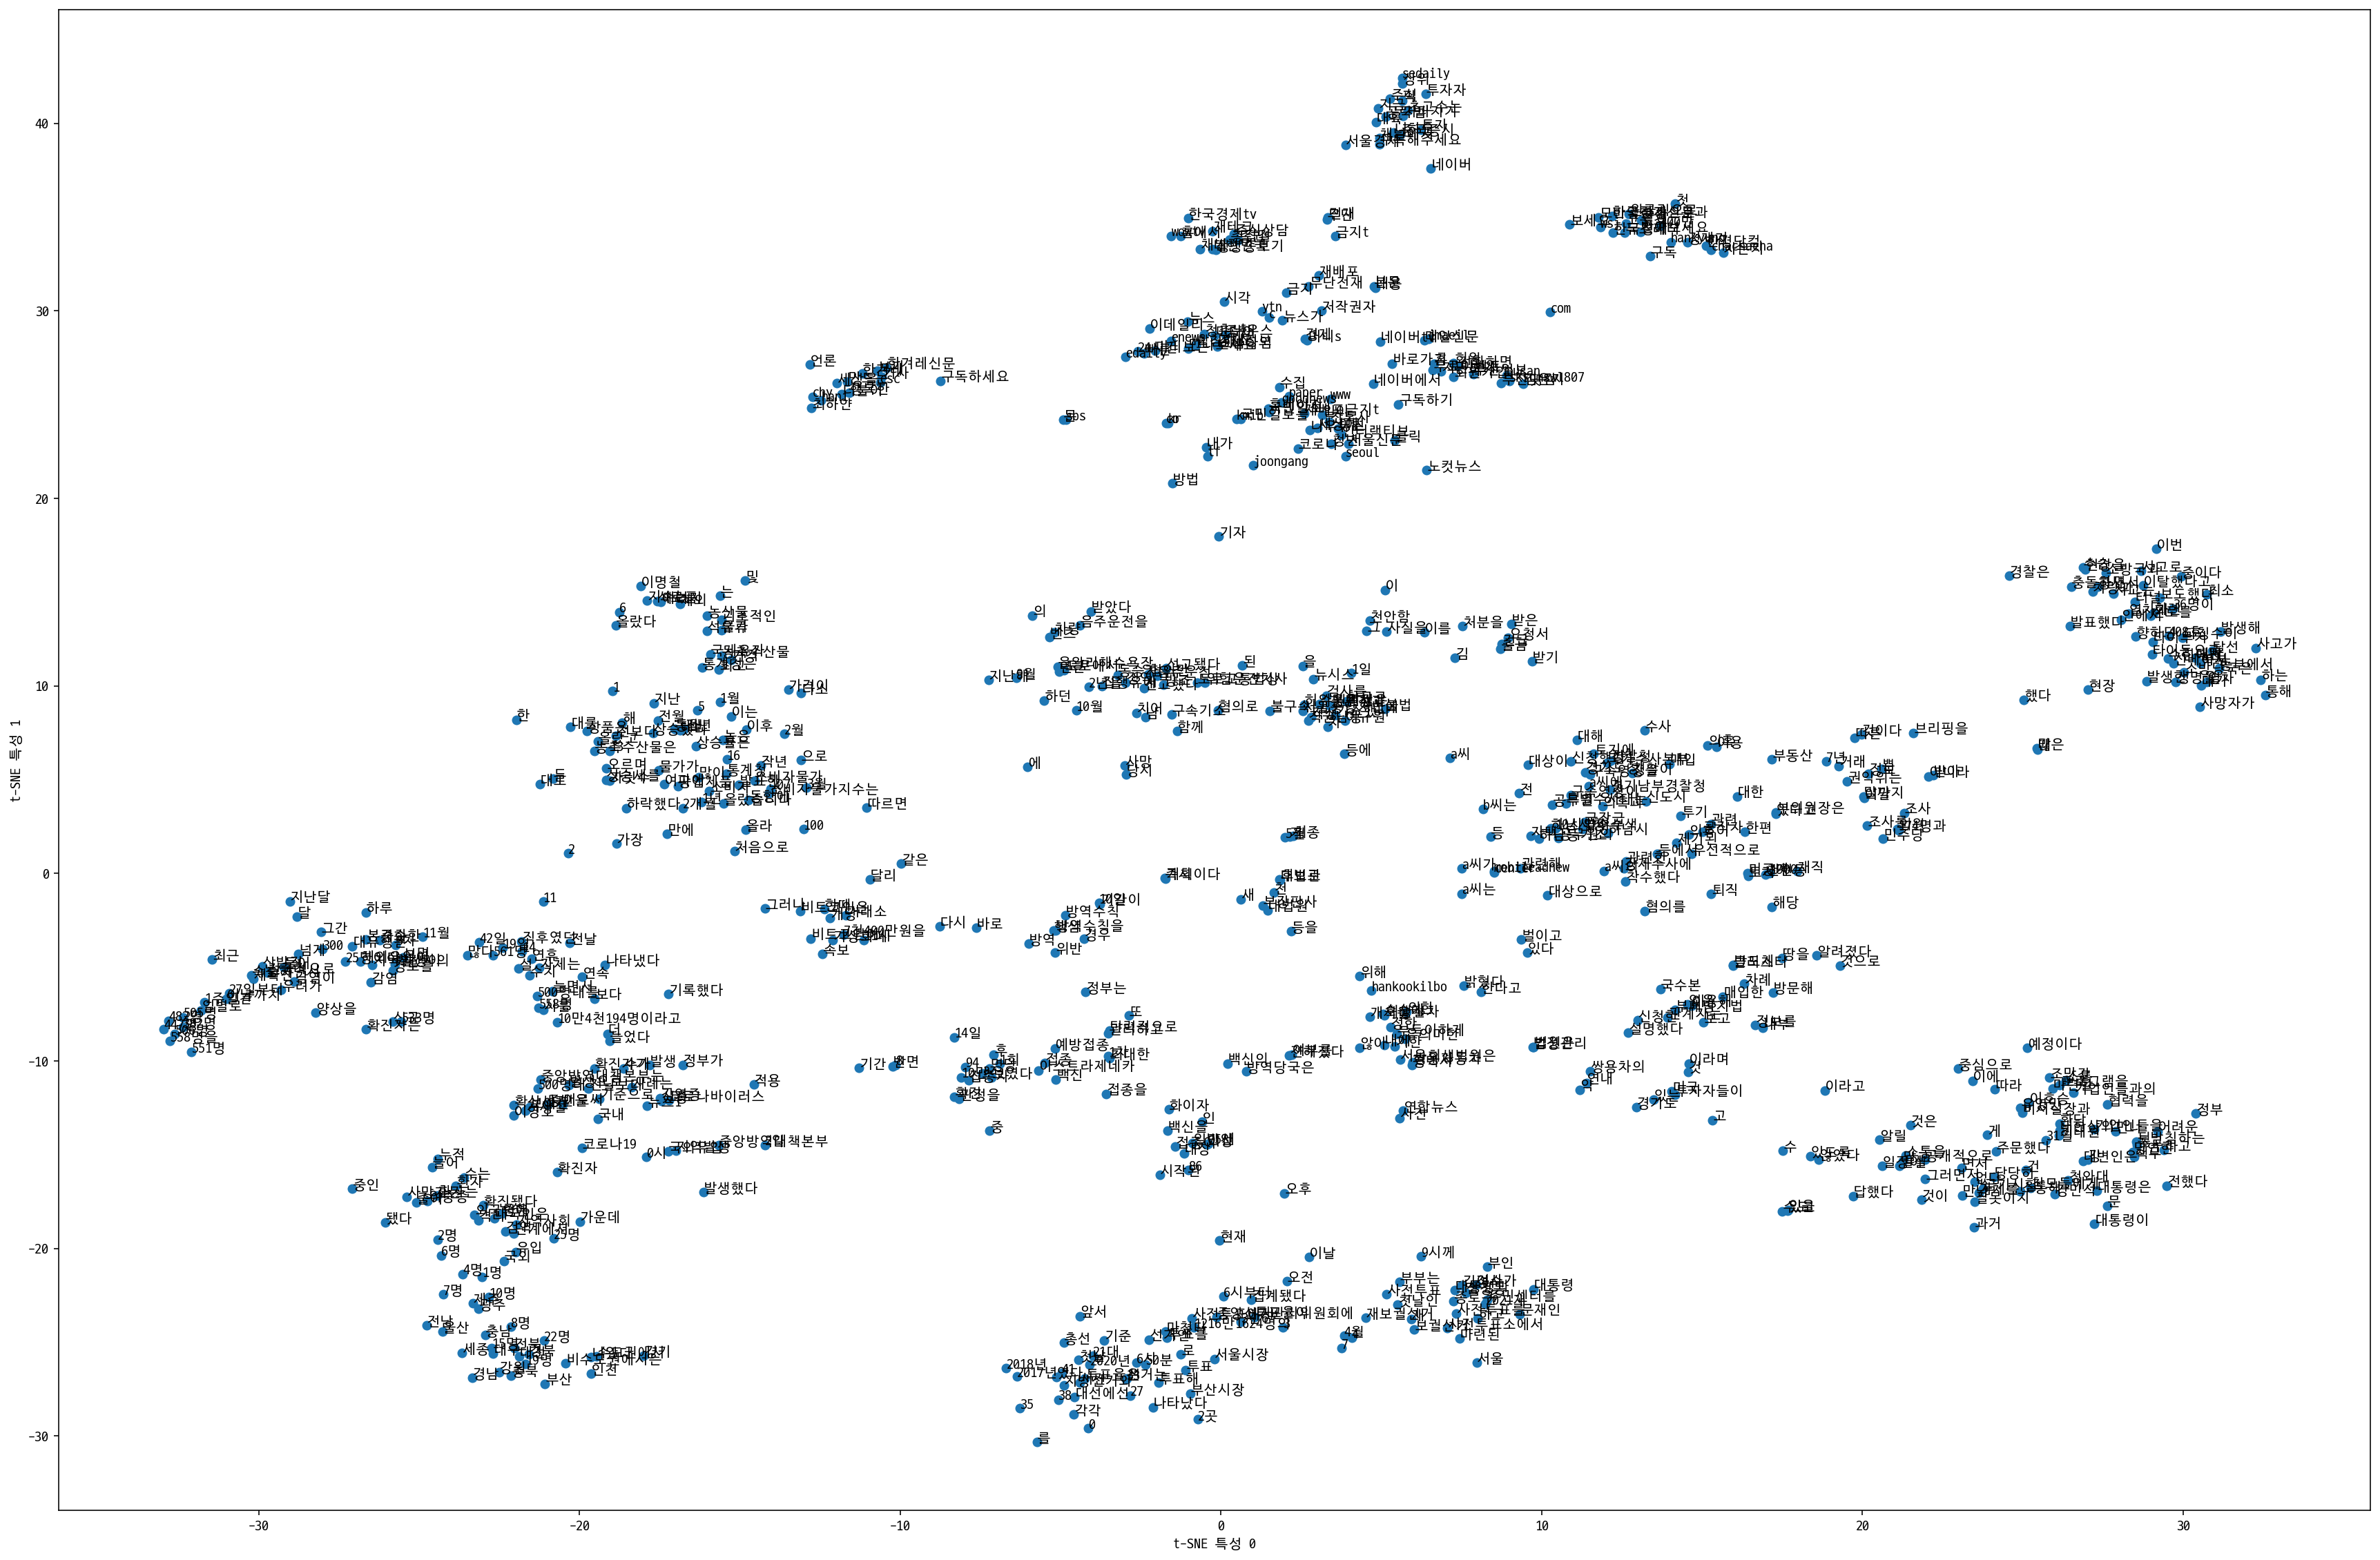

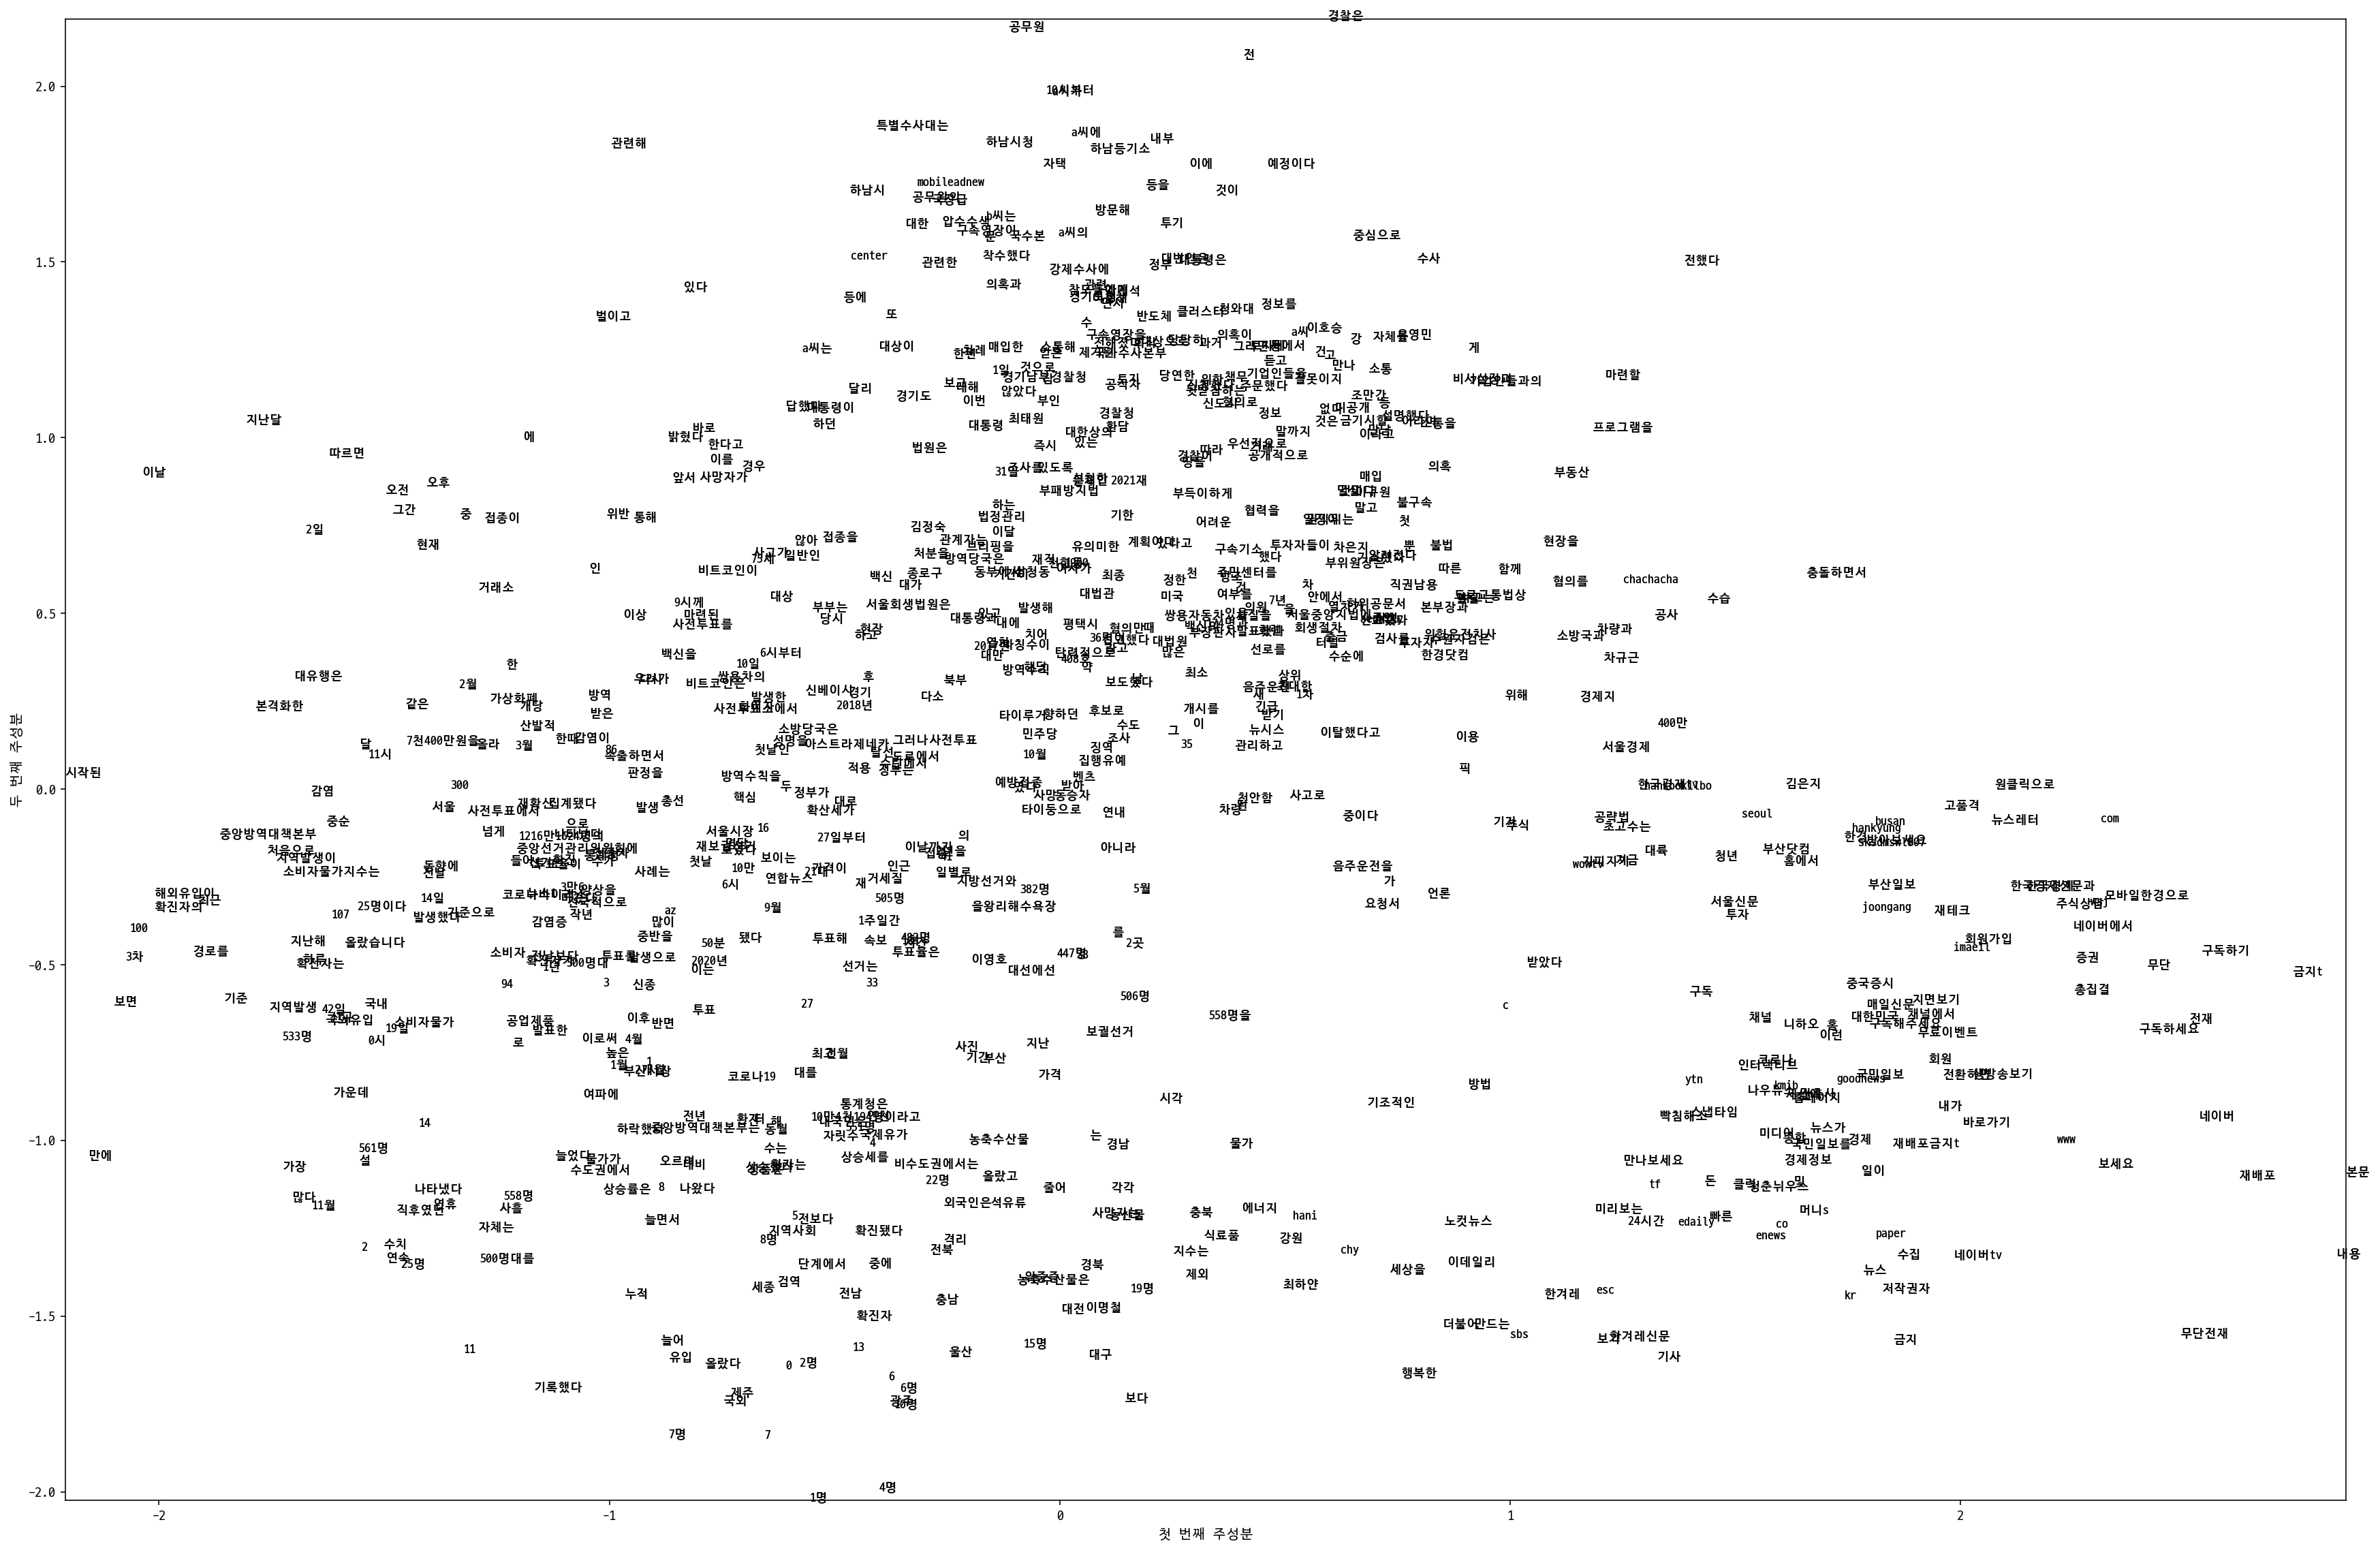

In [35]:
from sklearn.manifold import TSNE      # t-Stochastic Neighbor Embedding
from sklearn.decomposition import PCA  # Principal Component Analysis 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd 
from gensim.models import KeyedVectors 

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 
plt.rc('font', family='D2Coding') 

def show_tsne(): 
  tsne = TSNE(n_components=2) 
  X = tsne.fit_transform(X_show) 
  df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
  fig = plt.figure() 
  fig.set_size_inches(30, 20) 
  ax = fig.add_subplot(1, 1, 1) 
  ax.scatter(df['x'], df['y']) 
  for word, pos in df.iterrows(): 
    ax.annotate(word, pos, fontsize=10) 
  plt.xlabel("t-SNE 특성 0") 
  plt.ylabel("t-SNE 특성 1") 
  plt.show() 

def show_pca(): # PCA 모델을 생성합니다 
  pca = PCA(n_components=2) 
  pca.fit(X_show) # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
  x_pca = pca.transform(X_show) 
  plt.figure(figsize=(30, 20)) 
  plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
  plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
  for i in range(len(X_show)): 
    plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), fontdict={'weight': 'bold', 'size': 9}) 
  plt.xlabel("첫 번째 주성분") 
  plt.ylabel("두 번째 주성분") 
  plt.show() 

model_name = './vectors.txt' 
model = KeyedVectors.load_word2vec_format(model_name) 
vocab = list(model.key_to_index) 
X = model[vocab] 
# n 개의 단어에 대해서만 시각화 
n = 800 
X_show = X[:n,:] 
vocab_show = vocab[:n] 
show_tsne() 
show_pca()